In [1]:
# Simple linear Regression  
# Components of the regression equation 
# Influential points and outliers
# Analysis of residuals and tests of assumptions: 
# -linearity, homoscedasticity, normality, and independence of residuals
# Regression t-test and t-interval for the slope
# Proper interpretation of the confidence interval

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson

In [59]:
# Data

# Independent variable (x)
x_values = np.array([5, 4, 6, 5, 5, 5, 6, 6, 2, 7, 7])

# Dependent variable (y)
y_values = np.array([85, 103, 70, 82, 89, 98, 66, 95, 169, 70, 48])



Sample Data Points:
(5, 85)
(4, 103)
(6, 70)
(5, 82)
(5, 89)


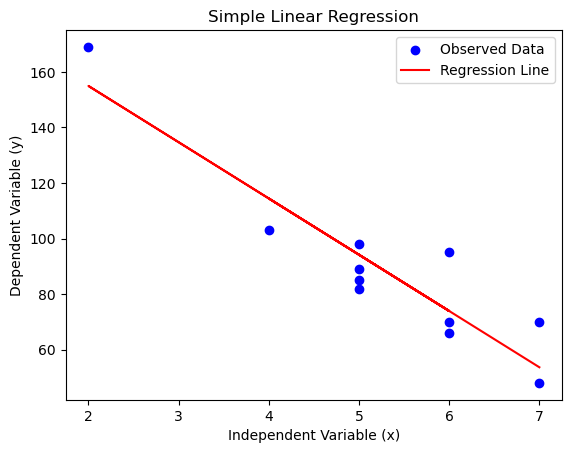

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     52.38
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           4.88e-05
Time:                        14:35:51   Log-Likelihood:                -42.355
No. Observations:                  11   AIC:                             88.71
Df Residuals:                       9   BIC:                             89.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.4685     15.240     12.826      0.0

C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
# Simple linear Regression Model 
# Perform simple linear regression using Ordinary Least Squares (OLS)

#     Parameters:
#     x (array-like): Independent variable
#     y (array-like): Dependent variable 
#     show_points (bool): If True, displays a few (x, y) data points.
#     Returns:
#     model: Fitted regression model
#     summary: Regression summary results

def simple_linear_regression(x, y, show_points=False):
   
    # Convert to NumPy arrays (if not already)
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)

    # Plot the data and regression line
    plt.scatter(x, y, label='Observed Data', color='blue')
    plt.plot(x, y_pred, label='Regression Line', color='red')
    plt.xlabel('Independent Variable (x)')
    plt.ylabel('Dependent Variable (y)')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()

    # Return model and summary
    return model, model.summary()

# Run regression analysis with data points displayed
model, summary = simple_linear_regression(x_values, y_values, show_points=True)

# Print regression summary
print(summary)

In [61]:
# Simple linear Regression Model 
#  Perform residual diagnostics: homoscedasticity, normality, and independence tests.
def analyze_residuals(x, y, show_points=False): 
    x = np.array(x)
    y = np.array(y)

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Homoscedasticity Tests
    bp_test = het_breuschpagan(residuals, X)  # Breusch-Pagan test
    gq_test = het_goldfeldquandt(residuals, X)  # Goldfeld-Quandt test

    print("\nHomoscedasticity Tests:")
    print(f"Breusch-Pagan Test p-value: {bp_test[1]:.4f} (p < 0.05 suggests heteroscedasticity)")
    print(f"Goldfeld-Quandt Test p-value: {gq_test[1]:.4f} (p < 0.05 suggests heteroscedasticity)")

    # Test for Independence of Residuals (Durbin-Watson)
    dw_statistic = durbin_watson(residuals)
    print("\nTest for Independence of Residuals:")
    print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
    if dw_statistic < 1.5:
        print(" - Possible positive autocorrelation (residuals are not independent).")
    elif 1.5 <= dw_statistic <= 2.5:
        print(" - Residuals appear to be independent (good).")
    else:
        print(" - Possible negative autocorrelation.")

    # Residual Plot
    plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (Check for Homoscedasticity)')
    plt.show()

    # QQ Plot of Residuals (Check for Normality)
    sm.qqplot(residuals, line='45', fit=True)
    plt.title('QQ Plot of Residuals (Check for Normality)')
    plt.show()

    return residuals, y_pred


Homoscedasticity Tests:
Breusch-Pagan Test p-value: 0.9853 (p < 0.05 suggests heteroscedasticity)
Goldfeld-Quandt Test p-value: 0.0076 (p < 0.05 suggests heteroscedasticity)

Test for Independence of Residuals:
Durbin-Watson Statistic: 1.2488
 - Possible positive autocorrelation (residuals are not independent).


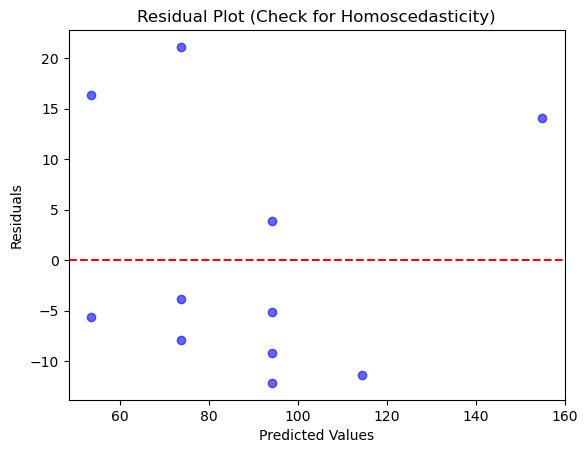

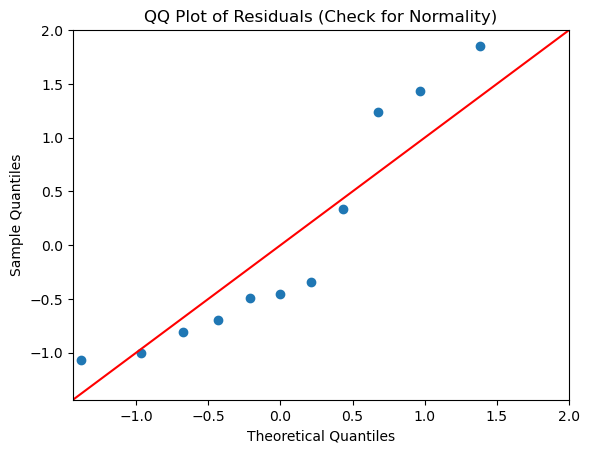


Sample Data Points:
(5, 85)
(4, 103)
(6, 70)
(5, 82)
(5, 89)

Potential Outliers (Std Residuals > ±2):
Empty DataFrame
Columns: [x, y, Residuals, Std Residuals, Leverage, Cook’s Distance, DFFITS, DFBETAS]
Index: []

Potential High Leverage Points (Leverage > 2(k+1)/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  

Potential Influential Points (Cook’s Distance > 4/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  


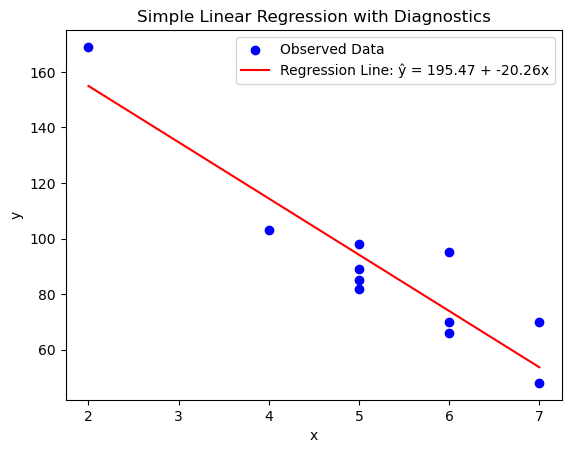

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     52.38
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           4.88e-05
Time:                        14:36:42   Log-Likelihood:                -42.355
No. Observations:                  11   AIC:                             88.71
Df Residuals:                       9   BIC:                             89.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.4685     15.240     12.826      0.0

C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
# Simple linear Regression Model 
# Perform simple linear regression and check for outliers & influential points.
def run_regression(x, y, show_points=False):
    x = np.array(x)
    y = np.array(y)

    # Optionally display some data points
    if show_points:
        print("\nSample Data Points:")
        for i in range(min(5, len(x))):  # Show up to 5 points
            print(f"({x[i]}, {y[i]})")

    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Generate predictions
    y_pred = model.predict(X)
    residuals = y - y_pred  # Compute residuals

    # Influence measures
    influence = model.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]
    dffits = influence.dffits[0]
    dfbetas = influence.dfbetas[:, 1]

    # Create DataFrame for diagnostics
    influence_df = pd.DataFrame({
        "x": x, "y": y, 
        "Residuals": residuals,
        "Std Residuals": standardized_residuals,
        "Leverage": leverage,
        "Cook’s Distance": cooks_d,
        "DFFITS": dffits,
        "DFBETAS": dfbetas
    })

    # Identify potential issues
    print("\nPotential Outliers (Std Residuals > ±2):")
    print(influence_df[np.abs(influence_df["Std Residuals"]) > 2])

    print("\nPotential High Leverage Points (Leverage > 2(k+1)/n):")
    leverage_threshold = 2 * (2 / len(x))  # (k+1) = 2 (intercept + slope)
    print(influence_df[influence_df["Leverage"] > leverage_threshold])

    print("\nPotential Influential Points (Cook’s Distance > 4/n):")
    cooks_threshold = 4 / len(x)
    print(influence_df[influence_df["Cook’s Distance"] > cooks_threshold])

    # Generate regression plot
    x_range = np.linspace(min(x), max(x), 100)
    y_range = model.params[0] + model.params[1] * x_range

    plt.scatter(x, y, color='blue', label='Observed Data')
    plt.plot(x_range, y_range, color='red', label=f'Regression Line: ŷ = {model.params[0]:.2f} + {model.params[1]:.2f}x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Simple Linear Regression with Diagnostics')
    plt.legend()
    plt.show()

    return model, model.summary(), influence_df

# Step 1: Run residual tests
residuals, y_pred = analyze_residuals(x_values, y_values, show_points=True)

# Step 2: Run regression
model, summary, influence_df = run_regression(x_values, y_values, show_points=True)

# Display summary
print(summary)


Homoscedasticity Tests:
Breusch-Pagan Test p-value: 0.9853 (p < 0.05 suggests heteroscedasticity)
Goldfeld-Quandt Test p-value: 0.0076 (p < 0.05 suggests heteroscedasticity)

Test for Independence of Residuals:
Durbin-Watson Statistic: 1.2488
 - Possible positive autocorrelation (residuals are not independent).


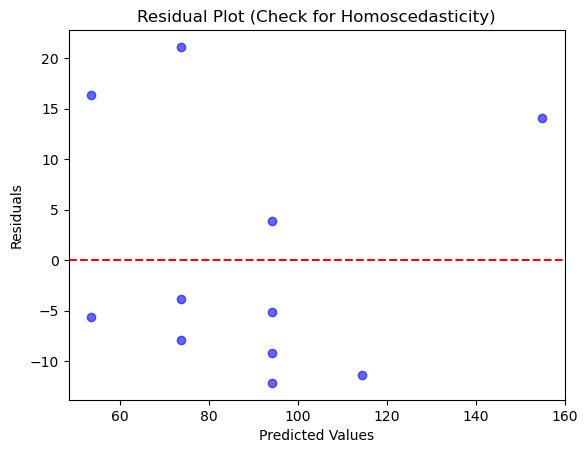

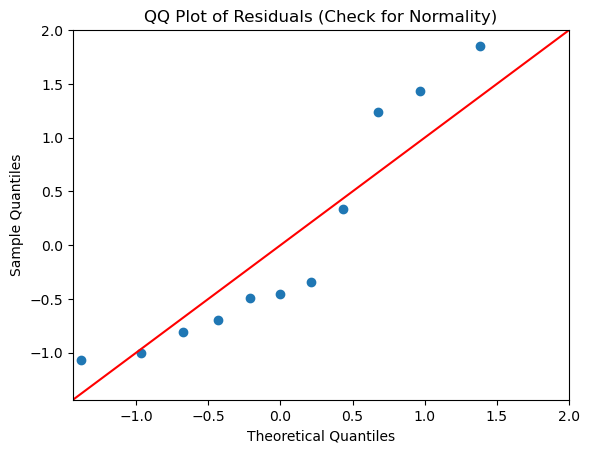


Sample Data Points:
(5, 85)
(4, 103)
(6, 70)
(5, 82)
(5, 89)

Potential Outliers (Std Residuals > ±2):
Empty DataFrame
Columns: [x, y, Residuals, Std Residuals, Leverage, Cook’s Distance, DFFITS, DFBETAS]
Index: []

Potential High Leverage Points (Leverage > 2(k+1)/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  

Potential Influential Points (Cook’s Distance > 4/n):
   x    y  Residuals  Std Residuals  Leverage  Cook’s Distance    DFFITS  \
8  2  169  14.054054       1.816671  0.621622         2.710954  2.758638   

   DFBETAS  
8 -2.54895  


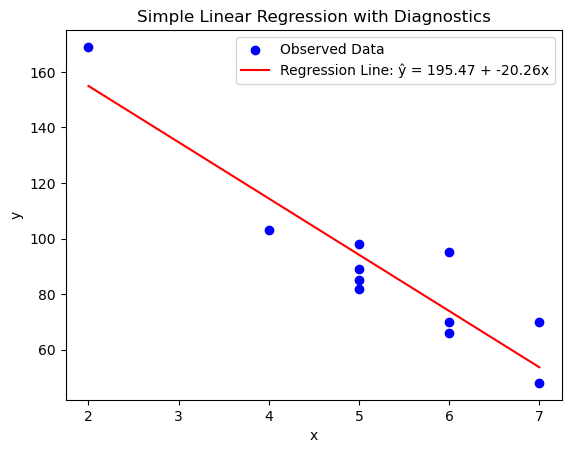


Sums of Squares:
SST (Total Sum of Squares): 9708.55
SSR (Regression Sum of Squares): 8285.01
SSE (Error Sum of Squares): 1423.53

Check: SST ≈ SSR + SSE ? Yes


C:\Users\Rashawn\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
# Simple linear Regression Model 
# Sum of Squares
def compute_sums_of_squares(y, y_pred):
    """
    Compute Total Sum of Squares (SST), Regression Sum of Squares (SSR), 
    and Error Sum of Squares (SSE).

    Parameters:
    y (array-like): Observed values
    y_pred (array-like): Predicted values

    Returns:
    tuple: (SST, SSR, SSE)
    """
    y_mean = np.mean(y)
    SST = np.sum((y - y_mean) ** 2)  # Total Sum of Squares
    SSR = np.sum((y_pred - y_mean) ** 2)  # Regression Sum of Squares
    SSE = np.sum((y - y_pred) ** 2)  # Error Sum of Squares
    
    return SST, SSR, SSE

# Step 1: Run residual tests
residuals, y_pred = analyze_residuals(x_values, y_values, show_points=True)

# Step 2: Run regression
model, summary, influence_df = run_regression(x_values, y_values, show_points=True)

# Compute SST, SSR, and SSE
SST, SSR, SSE = compute_sums_of_squares(y_values, y_pred)

# Print the results
print("\nSums of Squares:")
print(f"SST (Total Sum of Squares): {SST:.2f}")
print(f"SSR (Regression Sum of Squares): {SSR:.2f}")
print(f"SSE (Error Sum of Squares): {SSE:.2f}")

# Verify SST = SSR + SSE
print(f"\nCheck: SST ≈ SSR + SSE ? {'Yes' if np.isclose(SST, SSR + SSE) else 'No'}")


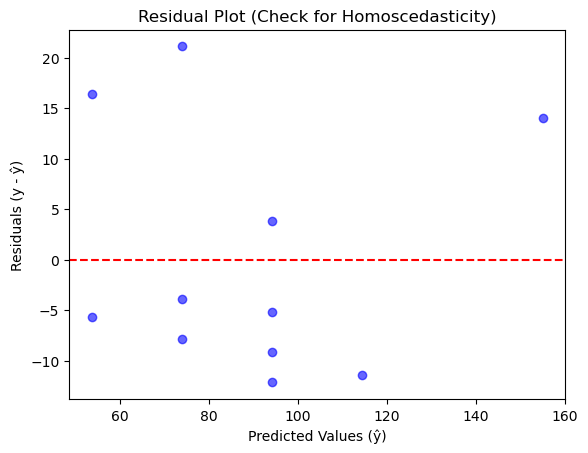

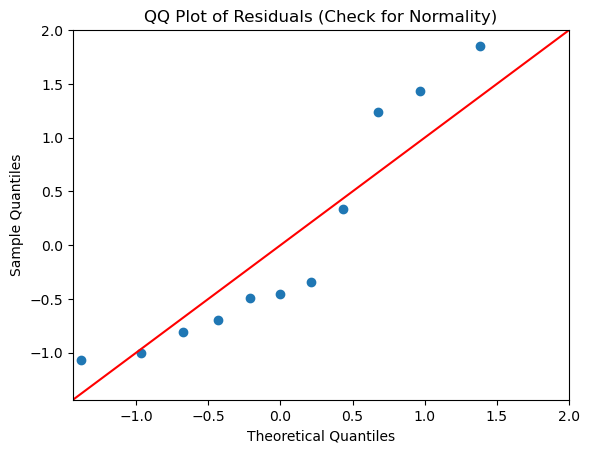


Durbin-Watson Statistic: 1.2488
 - Possible positive autocorrelation (residuals are not independent).


In [64]:
# Simple linear Regression Model 
# Analysis of residuals (same codde but outside the funciton)
# Residual Plot (Check for Homoscedasticity)
plt.scatter(model.fittedvalues, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (ŷ)')
plt.ylabel('Residuals (y - ŷ)')
plt.title('Residual Plot (Check for Homoscedasticity)')
plt.show()

# Normal Probability Plot (QQ Plot for Normality Check)
import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals (Check for Normality)')
plt.show()

# Durbin-Watson Test (Check for Independence of Residuals)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)

# Print Durbin-Watson Test result
print(f"\nDurbin-Watson Statistic: {dw_statistic:.4f}")
if dw_statistic < 1.5:
    print(" - Possible positive autocorrelation (residuals are not independent).")
elif 1.5 <= dw_statistic <= 2.5:
    print(" - Residuals appear to be independent (good).")
else:
    print(" - Possible negative autocorrelation.")


In [65]:
# Simple linear Regression Model 
# Compute Standard Error of the Estimate (S_e)
def compute_standard_error_of_estimate(residuals, n, k=1):
    """
    Compute the standard error of the estimate (S_e), which measures 
    the standard deviation of residuals.

    Parameters:
    residuals (array-like): Residual values (y - y_pred)
    n (int): Number of observations
    k (int): Number of predictors (default=1 for simple regression)

    Returns:
    float: Standard error of the estimate (S_e)
    """
    SSE = np.sum(residuals**2)  # Sum of Squared Errors
    df_error = n - (k + 1)  # Degrees of freedom (n - k - 1)
    S_e = np.sqrt(SSE / df_error)  # Standard error of the estimate
    return S_e

# Extract residuals from the model
residuals = model.resid

# Compute the standard error of the estimate
S_e = compute_standard_error_of_estimate(residuals, len(x_values))

# Print the result
print(f"\nStandard Error of the Estimate (S_e): {S_e:.4f}")


Standard Error of the Estimate (S_e): 12.5766


In [72]:
# Simple linear Regression Model 
# Regression t-test and t-interval for the slope
alpha = 0.05
confidence = 1-alpha

In [90]:
# Simple linear Regression Model 

# Function to perform the regression t-test for the slope with rejection condition
def regression_t_test(x, y, alpha=alpha):
    """
    Conduct a t-test for the slope of the regression line and determine
    whether to reject or fail to reject the null hypothesis.

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    alpha (float): Significance level (default: 0.05)

    Returns:
    dict: Contains t-statistic, p-value, degrees of freedom, decision on null hypothesis.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Extract t-statistic and p-value for the slope coefficient
    t_statistic = model.tvalues[1]  # Index 1 corresponds to the slope coefficient
    p_value = model.pvalues[1]  # Index 1 corresponds to the slope coefficient

    # Degrees of freedom: n - k - 1 (k=1 for simple regression)
    df = len(x) - 2

    # Non-directional (two-tailed) t-test critical value
    t_critical = stats.t.ppf((1 + confidence) / 2, df)

    # Decision rule: Reject H0 if |t_statistic| > t_critical or p-value < alpha
    reject_null = abs(t_statistic) > t_critical or p_value < alpha

    # Interpretation statement
    decision_statement = (
        f"At the {alpha*100}% significance level, "
        f"the data {'provide sufficient' if reject_null else 'do not provide sufficient'} evidence "
        f"to conclude that the slope of the population regression line is not 0, "
        f"and hence that the x-variable is {'useful' if reject_null else 'not useful'} as a (linear) predictor of the y-variable."
    )
    
    print('Regression t-Test for the Slope:\n')
    print(f'-Critical t-value: {t_critical:.4f}\n')
    print(f'-t-statistic: {t_statistic:.4f}\n')
    print(f'-p-value: {p_value:.4e}\n')
    print(f'-Degrees of freedom: {df}\n')
    print(f'-Reject Null Hypothesis: {"Yes" if reject_null else "No"}\n')
    print(f'-Conclusion: {decision_statement}')
          

# Run the updated regression t-test for the slope
t_test_results = regression_t_test(x_values, y_values, alpha)

# Display results
t_test_results


Regression t-Test for the Slope:

-Critical t-value: 2.2622

-t-statistic: -7.2374

-p-value: 4.8819e-05

-Degrees of freedom: 9

-Reject Null Hypothesis: Yes

-Conclusion: At the 5.0% significance level, the data provide sufficient evidence to conclude that the slope of the population regression line is not 0, and hence that the x-variable is useful as a (linear) predictor of the y-variable.


In [96]:
# Simple linear Regression Model 

# Function to compute the confidence interval for the slope with interpretation
def confidence_interval_slope(x, y, confidence=confidence):
    """
    Compute the confidence interval for the slope of the regression line and provide an interpretation.

    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    confidence (float): Confidence level (default: 95%)

    Returns:
    str: Formatted string containing the confidence interval and its correct interpretation.
    """
    # Add constant for intercept
    X = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Extract slope and its standard error
    slope = model.params[1]
    std_error = model.bse[1]

    # Compute critical t-value for given confidence level
    df = len(x) - 2  # Degrees of freedom
    t_critical = stats.t.ppf((1 + confidence) / 2, df)

    # Compute margin of error
    margin_of_error = t_critical * std_error

    # Compute confidence interval
    lower_bound = slope - margin_of_error
    upper_bound = slope + margin_of_error

    # Proper interpretation of the confidence interval
    interpretation = (
        f"Based on this sample, we computed a {confidence*100:.1f}% confidence interval for the slope "
        f"of the population regression line: ({lower_bound:.4f}, {upper_bound:.4f}). "
        f"This interval does not provide a probability statement about the true slope itself. "
        f"Instead, if we were to repeatedly sample from the population and construct similar intervals, "
        f"approximately {confidence*100:.1f}% of them would contain the true slope."
    )

    return f"""\nConfidence Interval for the Slope:
    - Confidence Level: {confidence*100:.1f}%
    - Lower Bound: {lower_bound:.4f}
    - Upper Bound: {upper_bound:.4f}
    - Interpretation: {interpretation}
    """

# Compute confidence interval for the slope with interpretation
ci_slope_interpreted = confidence_interval_slope(x_values, y_values)

# Display results
print(ci_slope_interpreted)


Confidence Interval for the Slope:
    - Confidence Level: 95.0%
    - Lower Bound: -26.5942
    - Upper Bound: -13.9283
    - Interpretation: Based on this sample, we computed a 95.0% confidence interval for the slope of the population regression line: (-26.5942, -13.9283). This interval does not provide a probability statement about the true slope itself. Instead, if we were to repeatedly sample from the population and construct similar intervals, approximately 95.0% of them would contain the true slope.
    
